### Scaling up the analysis:

Looping through all sampled "fake titles" and doing cosine analysis

In [67]:
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import pandas as pd
import csv
import os
import random
import numpy as np
import seaborn as sns
tfidf_vectorizer = TfidfVectorizer()

In [70]:
astrobio_1K = [line.rstrip('\n') for line in open('astrobio_1000.txt')]
df_astrobio_1K = pd.DataFrame(astrobio_1K)
df_astrobio_1K.columns = ['Title']
df_astrobio_1K.head()

,Title
0,"""Physical-chemical mechanisms of pattern forma..."
1,"""Prabhakar-like fractional viscoelasticity"""
2,"""Mathematical interpretation of Brownian motor..."
3,"""Ginzburg-Landau approximation for self-sustai..."
4,"""Synaptic dynamics regulation in response to h..."


In [71]:
test_results = []

with open("astrobio_1000_sample.txt", "r") as ins:
    for line in ins:
        df_astrobio_1K_test = df_astrobio_1K 
        df_astrobio_1K_test.loc[-1] = [line]
        df_astrobio_1K_test.index = df_astrobio_1K_test.index + 1
        df_astrobio_1K_test = df_astrobio_1K_test.sort_index()
        title_tuple = tuple(list(df_astrobio_1K_test['Title']))
        tfidf_matrix = tfidf_vectorizer.fit_transform(title_tuple)
        cosine_sim_array = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
        cos_sim = np.partition(cosine_sim_array.flatten(), -2)[-2] 
        angle_in_degrees = math.acos(cos_sim)
        most_similar1K = math.degrees(angle_in_degrees)
        test_results.append(most_similar1K)

print test_results[:10]

[82.06539062246614, 86.24688562767786, 90.0, 82.70334721657186, 80.27467505620912, 86.58880221545581, 75.95002375612066, 80.82226843151555, 84.6919819735666, 90.0]


In [72]:
print reduce(lambda x, y: x + y, test_results) / len(test_results)

79.6567113086


In [73]:
astrobio_1K_results = pd.DataFrame(np.array(test_results), columns = ['CosineSim1K'])
print astrobio_1K_results.head()

   CosineSim1K
0    82.065391
1    86.246886
2    90.000000
3    82.703347
4    80.274675


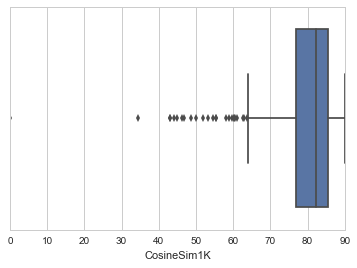

In [74]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.boxplot(x=astrobio_1K_results["CosineSim1K"])